
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for making plots
from matplotlib import pyplot as plt # used for scatter plot and Correlation lines
import pingouin as pg # used for calcutating Pearson correlation

df_mh = pd.read_csv('data for A1/MillerHadenData.csv')



In [5]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.dtypes)


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
Participant    int64
Abil           int64
IQ             int64
Home           int64
TV             int64
dtype: object


Participant is nominal.
Abil, IQ is interval, since a score of zero does not represent the complete absence of ability or intelligence.
Home and TV is ratio, since zero minutes means means no time spent reading or watching.

In [9]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())
# Check whether there is a data point for each participant on both variables
print(df_mh[['Abil','IQ']].isnull().sum())
# The result indicates there is no missing values.

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Abil    0
IQ      0
dtype: int64


Abil : normal , 0.2354906052350998
IQ : normal , 0.49081143736839294
Home : normal , 0.5731353759765625
TV : normal , 0.32464978098869324


array([[<Axes: title={'center': 'Abil'}>, <Axes: title={'center': 'IQ'}>],
       [<Axes: title={'center': 'Home'}>, <Axes: title={'center': 'TV'}>]],
      dtype=object)

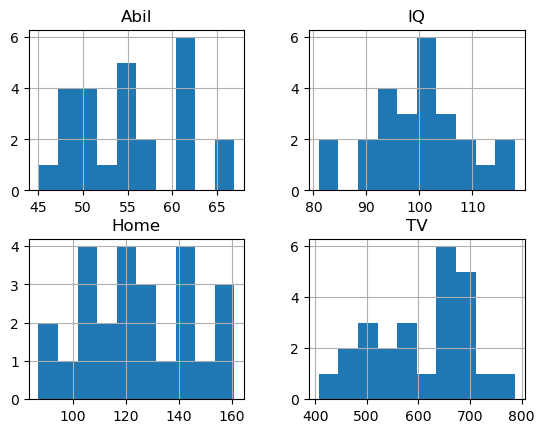

In [21]:
# Q1c (code):
# Check data distribution

import scipy.stats as stats

def normal_check(data, variable_name):
    score_shapiro_data, p_val_shapiro_data = stats.shapiro(data) # run the Shapiro-Wilk test to test for normal distribution 
    if p_val_shapiro_data>0.05:
        print(variable_name, ': normal', ',',p_val_shapiro_data) # show the result with the score of t test 
    else:
        print(variable_name,': not normal')
    
normal_check(df_mh['Abil'],'Abil')
normal_check(df_mh['IQ'],'IQ')
normal_check(df_mh['Home'],'Home')
normal_check(df_mh['TV'],'TV')

# show the histogram
df_mh.hist(['Abil','IQ','Home','TV']) 

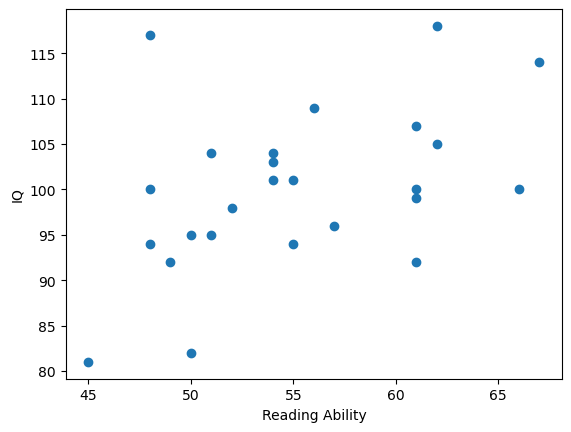

In [26]:
# Q1d (code):
# Scatter plot
#Save Reading Ability and IQ n separate variables
Abil = df_mh['Abil']
IQ = df_mh['IQ']
# draw the plot
plt.scatter(Abil, IQ)
# specify label of axis
plt.xlabel("Reading Ability")  
plt.ylabel("IQ") 
plt.show()

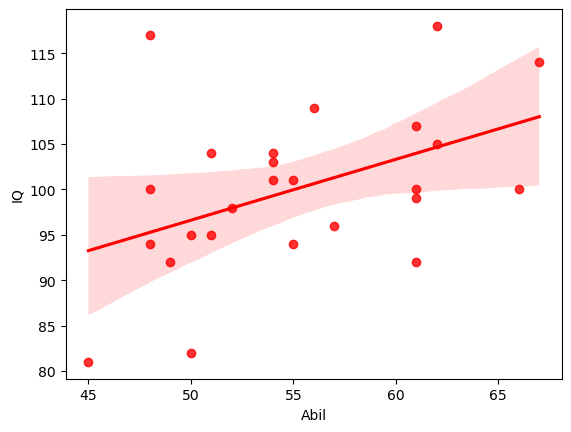

In [28]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh)
plt.show() 

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):
We should use the Pearson correlation coefficient, since the data is normally distributed in both variables.

In [30]:
# Q2b (code):
import pingouin as pg
corr_pearson = pg.corr(Abil, IQ, method ='pearson')
print(corr_pearson)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


# Q2c (answer with words):
The result indicates a statistically significant positive correlation between the two variables.
- The sample size is 25
- the correlation coefficient is 0.45117 and is positive
- the p-value is 0.023593, indicating that the correlation is statistically significant
- BF10 > 1 indicates evidence for the alternative hypothesis
- Statistical power is 0.640299, suggesting a moderate level of power to detect the observed correlation

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
H0: There is no difference in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).
H1: There are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).

In [38]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for manipulating data
from scipy.stats import chi2_contingency ##used for creating Contingency Matrix
import numpy as np # assign the group to each data

# Define the rounded average for Reading Ability and Home
avg_Abil = df_mh['Abil'].mean().round(2)
avg_Home = df_mh['Home'].mean().round(2)
print('avg Reading Ability: ',avg_Abil,'\navg Home: ',avg_Home)
# Create the Rank_Abil column
df_mh['Rank_Abil'] = np.where(df_mh['Abil'] > avg_Abil, 'high', 'low')
# Create the Rank_Home column
df_mh['Rank_Home'] = np.where(df_mh['Home'] > avg_Home, 'frequent', 'infrequent')
print(df_mh)

avg Reading Ability:  55.12 
avg Home:  124.0
    Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0             1    61  107   144  487      high    frequent
1             2    56  109   123  608      high  infrequent
2             3    45   81   108  640       low  infrequent
3             4    66  100   155  493      high    frequent
4             5    49   92   103  636       low  infrequent
5             6    62  105   161  407      high    frequent
6             7    61   92   138  463      high    frequent
7             8    55  101   119  717       low  infrequent
8             9    62  118   155  643      high    frequent
9            10    61   99   121  674      high  infrequent
10           11    51  104    93  675       low  infrequent
11           12    48  100   127  595       low    frequent
12           13    50   95    97  673       low  infrequent
13           14    50   82   140  523       low    frequent
14           15    67  114   151  665      high    fre

This is the Contingency Matrix I want to build:
|  Home/Abil               | high | low | Total |
|------------------|-----------------|-----------------|----------------------|
| frequent  |  |              |               |
| infrequent   | |           |              |
| Total  | |        |   |

In [46]:
# Q3c (code):
# Construct Contingency Matrix
def CountforContigencyMatrix(df,Rank_Abil, Rank_Home):
    return ((df['Rank_Abil'] == Rank_Abil) & (df['Rank_Home'] == Rank_Home)).sum()
    
high_frequent = CountforContigencyMatrix(df_mh, 'high','frequent')
high_infrequent = CountforContigencyMatrix(df_mh, 'high','infrequent')
low_frequent = CountforContigencyMatrix(df_mh, 'low','frequent')
low_infrequent = CountforContigencyMatrix(df_mh, 'low','infrequent')
data4contingency = [high_frequent, low_frequent, high_infrequent,low_infrequent]
print('The values:')
print(data4contingency)

# transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)
print('The contingency matrix')
print(data_cm)

The values:
[8, 3, 2, 12]
The contingency matrix
[[ 8  3]
 [ 2 12]]


In [47]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 6.6]
 [5.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


# Q3e (answer in words):
The observed differences are statiscally significant - H0 is rejected, so there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [5]:
import pandas as pd # used for manipulating data
from scipy import stats # used for calculating tests


# Load the data
df_evaluators = pd.read_csv('data for A1/evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [7]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
standard_deviation_age = df_evaluators['age'].std()
print('mean:',mean_age,'; standard deviation:', standard_deviation_age)


mean: 30.852941176470587 ; standard deviation: 6.238358141327351


In [8]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
female = (df_evaluators['sex'] == 2.0).sum()
male = (df_evaluators['sex'] == 1.0).sum()
print('female: ',female,'; male: ', male)

female:  30 ; male:  4


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [11]:
# Load ratings data
df_ratings = pd.read_csv('data for a1/ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [13]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_intellect = df_ratings[df_ratings['Category'].isin(['thoughtful' , 'competent' ,'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
df_intellect = df_intellect[['eval_id','Rating']]
df_intellect = df_intellect.groupby('eval_id')['Rating'].mean().reset_index()
# Add a 'Category' column with the value 'intellect' for these rows
df_intellect['Category'] ='intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
df_impression = df_ratings[df_ratings['Category']=='impression']
df_impression.groupby('eval_id')['Rating'].agg(['mean']).reset_index()

df_hire = df_ratings[df_ratings['Category']=='hire']
df_hire.groupby('eval_id')['Rating'].agg(['mean']).reset_index()

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([df_hire, df_impression ], ignore_index=True)
ratings2 = pd.concat([df_intellect, ratings2 ], ignore_index=True)
print(ratings2)
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id','condition']], on='eval_id')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id','Category','Rating','condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

     eval_id    Rating    Category
0          1  6.000000   intellect
1          2  5.666667   intellect
2          3  6.000000   intellect
3          4  3.333333   intellect
4          5  1.000000   intellect
..       ...       ...         ...
112       35  6.000000  impression
113       36  7.666667  impression
114       37  5.333333  impression
115       38  8.333333  impression
116       39  5.666667  impression

[117 rows x 3 columns]


,eval_id,Category,Rating,condition
1,1,hire,6.000000,listened
2,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
4,2,hire,4.000000,listened
5,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
There are 3 groups of hypotheses:

For Intellect group:
H0 = There is no difference between overall ratings on the Intellect scale between the evaluators who listened to pitches and evaluators that read pitches.
H1 = There is a significant difference between overall ratings on the Intellect scale between evaluators who listened to pitches and evaluators who read pitches.

For Hire group:
H0 = There is no difference between overall ratings on the Hire scale between the evaluators who listened to pitches and evaluators that read pitches.
H1 = There is a significant difference between overall ratings on the Hire scale between evaluators who listened to pitches and evaluators who read pitches.

For Impression group:
H0 = There is no difference between overall ratings on the Impression scale between the evaluators who listened to pitches and evaluators that read pitches.
H1 = There is a significant difference between overall ratings on the Impression scale between evaluators who listened to pitches and evaluators who read pitches.

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
Use two-tail, because we do not have a specific expectation about the direction of the difference.

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
The independnt variable is condition, and the dependent one is ratings


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [54]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for calculating these tests.

# Descriptive analysis of the ratings
# get 3 groups within Category
sub_df = ratings2.groupby('Category')
df_intellect = sub_df.get_group('intellect')
df_hire = sub_df.get_group('hire')
df_impression = sub_df.get_group('impression')

# get descriptive statistics of dataframe
def get_descriptive_statistics(df):
    sub_df = df.groupby('condition')
    df_read = sub_df.get_group('read')
    df_listened = sub_df.get_group('listened')
    result_read = df_read['Rating'].describe()
    result_listened = df_listened['Rating'].describe()
    return  result_read,result_listened

# print the result 
def print_condition(df,CategoryName):
    print(f'Overall ratings on the {CategoryName} scale from the evaluators who listened to pitches:')
    result_read, result_listened = get_descriptive_statistics(df)
    print(result_listened)
    print(f'Overall ratings on the {CategoryName} scale from the evaluators who read pitches:')
    print(result_read)
    print('*'*30)# a dividing line
    
# print each group's result
print('Result for descriptive statistics:\n')
print(print_condition(df_intellect,'intellect'))
print(print_condition(df_hire,'hire'))
print(print_condition(df_impression,'impression'))
print('*'*100) # a dividing line

# Test for normal distribution (Shapiro-Wilk test)
# calculate p-value of 'Rating' from each group's dataframe
def normal_p_value(df,CategoryName):
    score_shapiro, p_val_shapiro = stats.shapiro(df['Rating'])
    return p_val_shapiro

# print whether the distribution is normal
def normal(p_value, CategoryName):
    if p_value > 0.05:
        output = f'The distribution of {CategoryName} is normal; p value = {p_value}'
    else:
        output = f'The distribution of {CategoryName} is not normal; p value = {p_value}'
    return output

# calculate p-value of 2 conditions within each group
def normal_condition(df, CategoryName):
    # get groups by condition
    sub_df = df.groupby('condition')
    df_read = sub_df.get_group('read')
    df_listened = sub_df.get_group('listened') 
    # calculate p-value for each conditoin
    read_p_value = normal_p_value(df_read, CategoryName)
    listened_p_value = normal_p_value(df_listened, CategoryName)
    # print the result
    read = normal(read_p_value,'readers')
    listened =normal(listened_p_value,'listeners')
    return read + '\n'+ listened

# print result
print('Result for Shapiro-Wilk test:\n')
print('for intellect:\n',normal_condition(df_intellect, 'intellect'),'\n')
print('for hire:\n',normal_condition(df_hire, 'hire'),'\n')
print('for impression:\n',normal_condition(df_impression, 'impression'),'\n')
print('*'*100) # a dividing line

# Test for homogeneity of variances (Levene's test)
def Homogeneity(df, CategoryName):
    sub_df = df.groupby('condition')
    df_read = sub_df.get_group('read')
    df_listened = sub_df.get_group('listened') 
    score, p_val = stats.levene(df_read['Rating'], df_listened['Rating'])
    if p_val < 0.05:
        output = "Levene's test is significant - use Welch's test"
    else:
        output = "Levene's test is not significant - proceed"
    print('for', CategoryName, ':\n','p_value= ', p_val)
    return output

# print result
print("Result for Levene's test:\n")
print(Homogeneity(df_intellect,'intellect'),'\n')
print('for hire:\n',Homogeneity(df_hire,'hire'),'\n')
print('for impression:\n',Homogeneity(df_impression,'impression'),'\n')
print('*'*100) # a dividing line

# Independent t-tests
def ttest(df,CategoryName):
    sub_df = df.groupby('condition')
    df_read = sub_df.get_group('read')
    df_listened = sub_df.get_group('listened') 
    ttest_score, p_val = stats.ttest_ind(df_listened['Rating'], df_read['Rating'])
    if p_val < 0.05:
        output = f'Difference is statistically significant - reject H0, confirm H1\np value = {p_val}'
    else:
        output = f'Difference is NOT statistically significant - reject H1, confirm H0\np value = {p_val}'
    return output

# print result   
print('Result for Independent t-tests :\n')
print('for intellect:\n',ttest(df_intellect,'intellect'))
print('for hire:\n',ttest(df_hire,'hire'))
print('for impression:\n',ttest(df_impression,'impression'))

#ratings_desc, shapiro_results, levene_results, ttest_results

Result for descriptive statistics:

Overall ratings on the intellect scale from the evaluators who listened to pitches:
count    21.000000
mean      5.634921
std       1.608674
min       2.333333
25%       5.000000
50%       5.666667
75%       6.000000
max       9.000000
Name: Rating, dtype: float64
Overall ratings on the intellect scale from the evaluators who read pitches:
count    18.000000
mean      3.648148
std       1.911343
min       0.666667
25%       2.083333
50%       3.666667
75%       4.666667
max       7.000000
Name: Rating, dtype: float64
******************************
None
Overall ratings on the hire scale from the evaluators who listened to pitches:
count    21.000000
mean      4.714286
std       2.261479
min       0.000000
25%       4.000000
50%       5.000000
75%       7.000000
max       8.000000
Name: Rating, dtype: float64
Overall ratings on the hire scale from the evaluators who read pitches:
count    18.000000
mean      2.888889
std       2.054805
min       0.0000

# Q7b (answer in words):
## Descriptive statistics:
- On the Intellect scale, listeners exhibit a higher mean and median in ratings compared to readers, with both groups showing a similar range of approximately 7. 
- On the Hire scale, listeners demonstrate a higher mean and median, as well as a wider range of ratings than readers. 
- On the Impression scale, listeners have a higher mean and median in ratings than readers, but they exhibit a narrower range of ratings.

## Shapiro-Wilk test:
Since the p-values for Levene's test in all scales are greater than 0.05, we do not have sufficient evidence to reject the null hypothesis. Therefore, the distribution of readers and listeners is normal on intellect, hire and impression scales.

## Levene's test:
Since the p-values for Levene's test in all scales are greater than 0.05, we do not have sufficient evidence to reject the null hypothesis. Therefore, we assume that the variances across the groups are equal.

## Independent t-tests:
Since the p-values for Independent t-tests in all scales are smaller than 0.05, we have sufficient evidence to reject the null hypothesis. Therefore, there is a significant difference in overall ratings between evaluators who listened to pitches and evaluators who read pitches on intellect, hire and impression scales.
